In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [5]:
DATA_PATH = '../dados/processados/escolaridade_estados.csv'
df = pd.read_csv(DATA_PATH, index_col=0)
df = df.reset_index(drop=True)
df

,CS_ESCOL_N,SG_UF_NOT,qtd,taxa
0,fund,AC,15,5.813953
1,fund,AL,19,1.597981
2,fund,AM,1299,118.956044
3,fund,AP,23,11.057692
4,fund,BA,165,3.270565
...,...,...,...,...
103,sup,RS,168,8.175182
104,sup,SC,111,8.624709
105,sup,SE,19,7.037037
106,sup,SP,2943,30.200103


In [6]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=df, res_var='taxa', anova_model='taxa ~ C(CS_ESCOL_N)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(CS_ESCOL_N),3.0,3315.331432,1105.110477,0.874591,0.456858
Residual,104.0,131411.635530,1263.573419,NaN,NaN


In [15]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('taxa ~ C(CS_ESCOL_N)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(CS_ESCOL_N),3315.331432,3.0,0.874591,0.456858
Residual,131411.635530,104.0,NaN,NaN


In [9]:
res = stat()
res.tukey_hsd(df=df, res_var='taxa', xfac_var='CS_ESCOL_N', anova_model='taxa ~ C(CS_ESCOL_N)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,fund,med,0.391507,-24.870898,25.653911,0.057230,0.900000
1,fund,sem,13.184483,-12.077922,38.446888,1.927280,0.522586
2,fund,sup,2.147851,-23.114554,27.410256,0.313968,0.900000
3,med,sem,13.575990,-11.686415,38.838395,1.984509,0.500021
4,med,sup,2.539358,-22.723047,27.801763,0.371198,0.900000
5,sem,sup,11.036632,-14.225773,36.299037,1.613311,0.646384


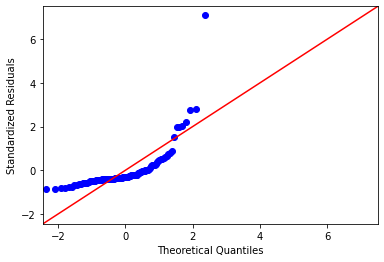

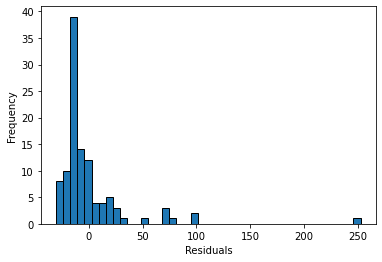

In [12]:
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [16]:
import scipy.stats as stats
w, pvalue = stats.shapiro(model.resid)
print(w, pvalue)

0.579574465751648 4.300497181586614e-16


In [18]:
from bioinfokit.analys import stat 
res = stat()
res.levene(df=df, res_var='taxa', xfac_var='CS_ESCOL_N')
res.levene_summary

,Parameter,Value
0,Test statistics (W),0.8015
1,Degrees of freedom (Df),3.0000
2,p value,0.4958
